<a href="https://colab.research.google.com/github/marcinmichalsmolen/adam/blob/main/TFDS_FLOWERS_VGG_DOBRZE_30epok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training model with Adagrad optimizer...
Epoch 1/30
46/46 [==============================] - 9s 158ms/step - loss: 1.5011 - accuracy: 0.3495 - val_loss: 1.4070 - val_accuracy: 0.4387
Epoch 2/30
46/46 [==============================] - 8s 164ms/step - loss: 1.2998 - accuracy: 0.5208 - val_loss: 1.2637 - val_accuracy: 0.5422
Epoch 3/30
46/46 [==============================] - 7s 148ms/step - loss: 1.1757 - accuracy: 0.5960 - val_loss: 1.1654 - val_accuracy: 0.5777
Epoch 4/30
46/46 [==============================] - 7s 141ms/step - loss: 1.0849 - accuracy: 0.6393 - val_loss: 1.0883 - val_accuracy: 0.6104
Epoch 5/30
46/46 [==============================] - 7s 159ms/step - loss: 1.0124 - accuracy: 0.6761 - val_loss: 1.0271 - val_accuracy: 0.6185
Epoch 6/30
46/46 [==============================] - 7s 146ms/step - loss: 0.9523 - accuracy: 0.6993 - val_loss: 0.9751 - val_accuracy: 0.6458
Epoch 7/30
46/46 [==============================] - 8s 161ms/step - loss: 0.9016 - accuracy: 0.7180 - val_l

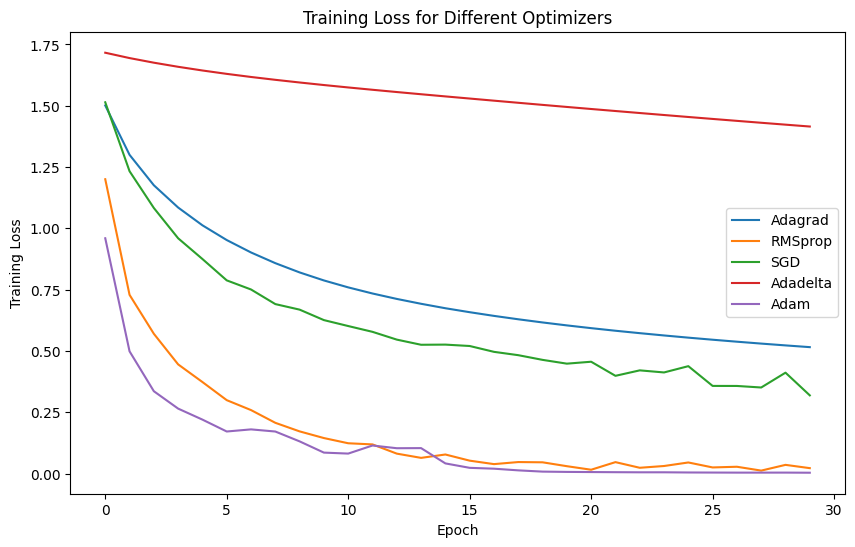

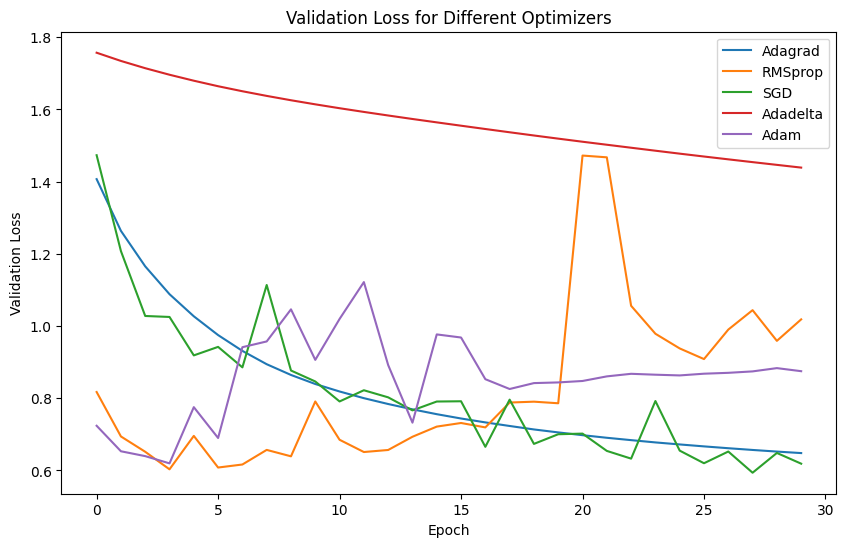

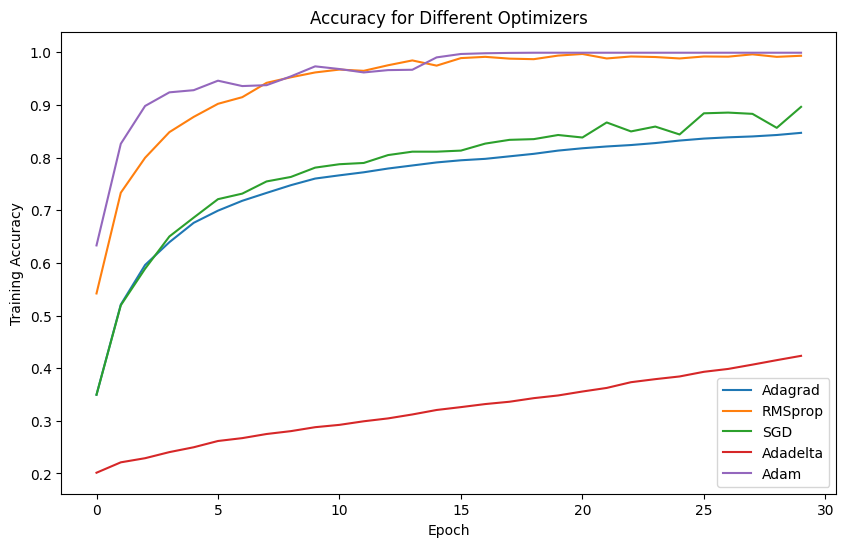

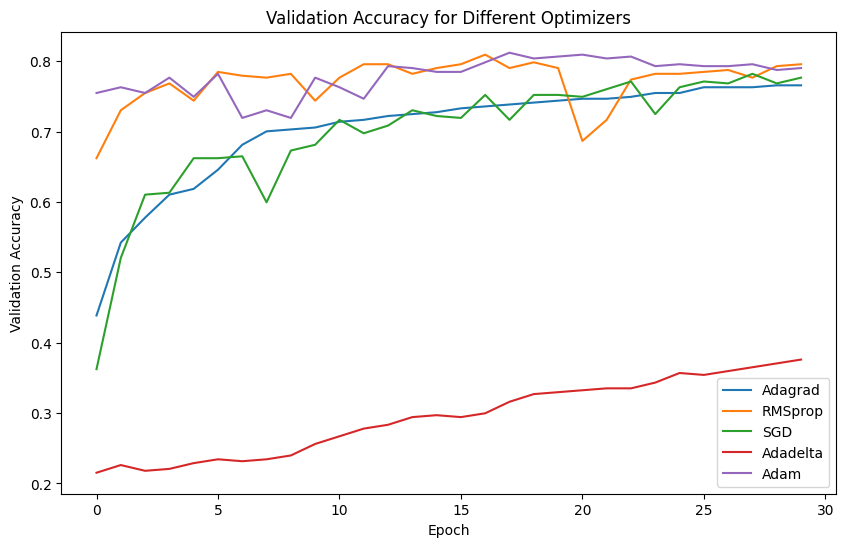

In [6]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adagrad, RMSprop, SGD, Adadelta, Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load TFDS dataset
dataset_name = 'tf_flowers'
(train_dataset, validation_dataset, test_dataset), dataset_info = tfds.load(
    name=dataset_name,
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    shuffle_files=True,
    with_info=True,
    as_supervised=True
)

# Preprocess data
def preprocess(image, label):
    image = tf.image.resize(image, (150, 150)) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess)
validation_dataset = validation_dataset.map(preprocess)
test_dataset = test_dataset.map(preprocess)

# Define model
def create_model():
    base_model = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
    base_model.trainable = False  # Wagi nie będą trenowane

    from tensorflow.keras import layers, models

    flatten_layer = layers.Flatten()
    dense_layer_1 = layers.Dense(50, activation='relu')
    dense_layer_2 = layers.Dense(20, activation='relu')
    prediction_layer = layers.Dense(5, activation='softmax')

    model_tfds = models.Sequential([
        base_model,
        flatten_layer,
        dense_layer_1,
        dense_layer_2,
        prediction_layer
    ])

    return model_tfds

# Define training settings
batch_size = 64
epochs = 30
optimizer_names = ['Adagrad', 'RMSprop', 'SGD', 'Adadelta', 'Adam']
optimizers = [Adagrad(), RMSprop(), SGD(), Adadelta(), Adam()]

# Train models with different optimizers
history = {}
for optimizer_name, optimizer in zip(optimizer_names, optimizers):
    print(f'Training model with {optimizer_name} optimizer...')
    model_tfds = create_model()
    model_tfds.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history[optimizer_name] = model_tfds.fit(train_dataset.batch(batch_size), epochs=epochs,
                                             validation_data=validation_dataset.batch(batch_size))

# Plot training loss for all models on one graph
plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['loss'], label=optimizer_name)
plt.title('Training Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['val_loss'], label=optimizer_name)
plt.title('Validation Loss for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['accuracy'], label=optimizer_name)
plt.title('Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for optimizer_name in optimizer_names:
    plt.plot(history[optimizer_name].history['val_accuracy'], label=optimizer_name)
plt.title('Validation Accuracy for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()
